<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Lesson_10_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns

In [2]:
uploaded = files.upload()

Saving glass.csv to glass.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['glass.csv']))
df.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Type']).values, df['Type'].values, test_size=0.2, random_state=42)


In [74]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
print(f"{model.score(X_train, y_train)} {model.score(X_test, y_test)}")
print("\n")
y_pred = model.predict(X_test)
print(f"accuracy= {accuracy_score(y_test, y_pred)}")

1.0 0.8604651162790697


accuracy= 0.8604651162790697


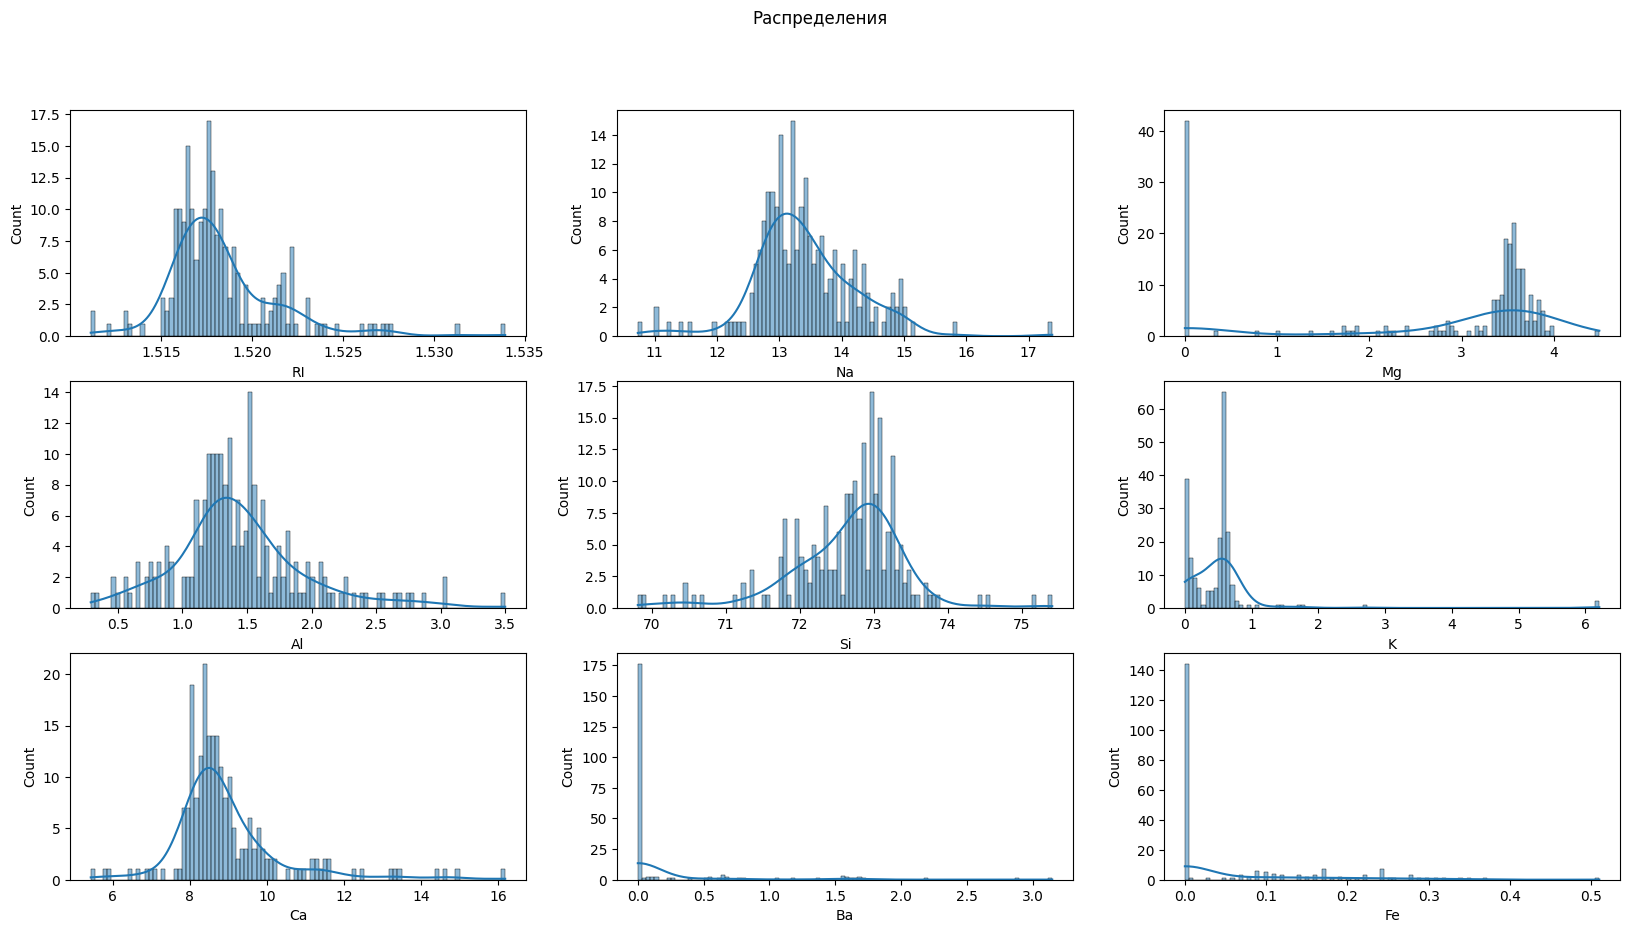

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10) )
fig.suptitle('Распределения')
bins=100
sns.histplot(df['RI'], ax=axs[0, 0], bins=bins, kde=True)
sns.histplot(df['Na'], ax=axs[0, 1], bins=bins, kde=True)
sns.histplot(df['Mg'], ax=axs[0, 2], bins=bins, kde=True)

sns.histplot(df['Al'], ax=axs[1, 0], bins=bins, kde=True)
sns.histplot(df['Si'], ax=axs[1, 1], bins=bins, kde=True)
sns.histplot(df['K'], ax=axs[1, 2], bins=bins, kde=True)

sns.histplot(df['Ca'], ax=axs[2, 0], bins=bins, kde=True)
sns.histplot(df['Ba'], ax=axs[2, 1], bins=bins, kde=True)
sns.histplot(df['Fe'], ax=axs[2, 2], bins=bins, kde=True)

fig.show()

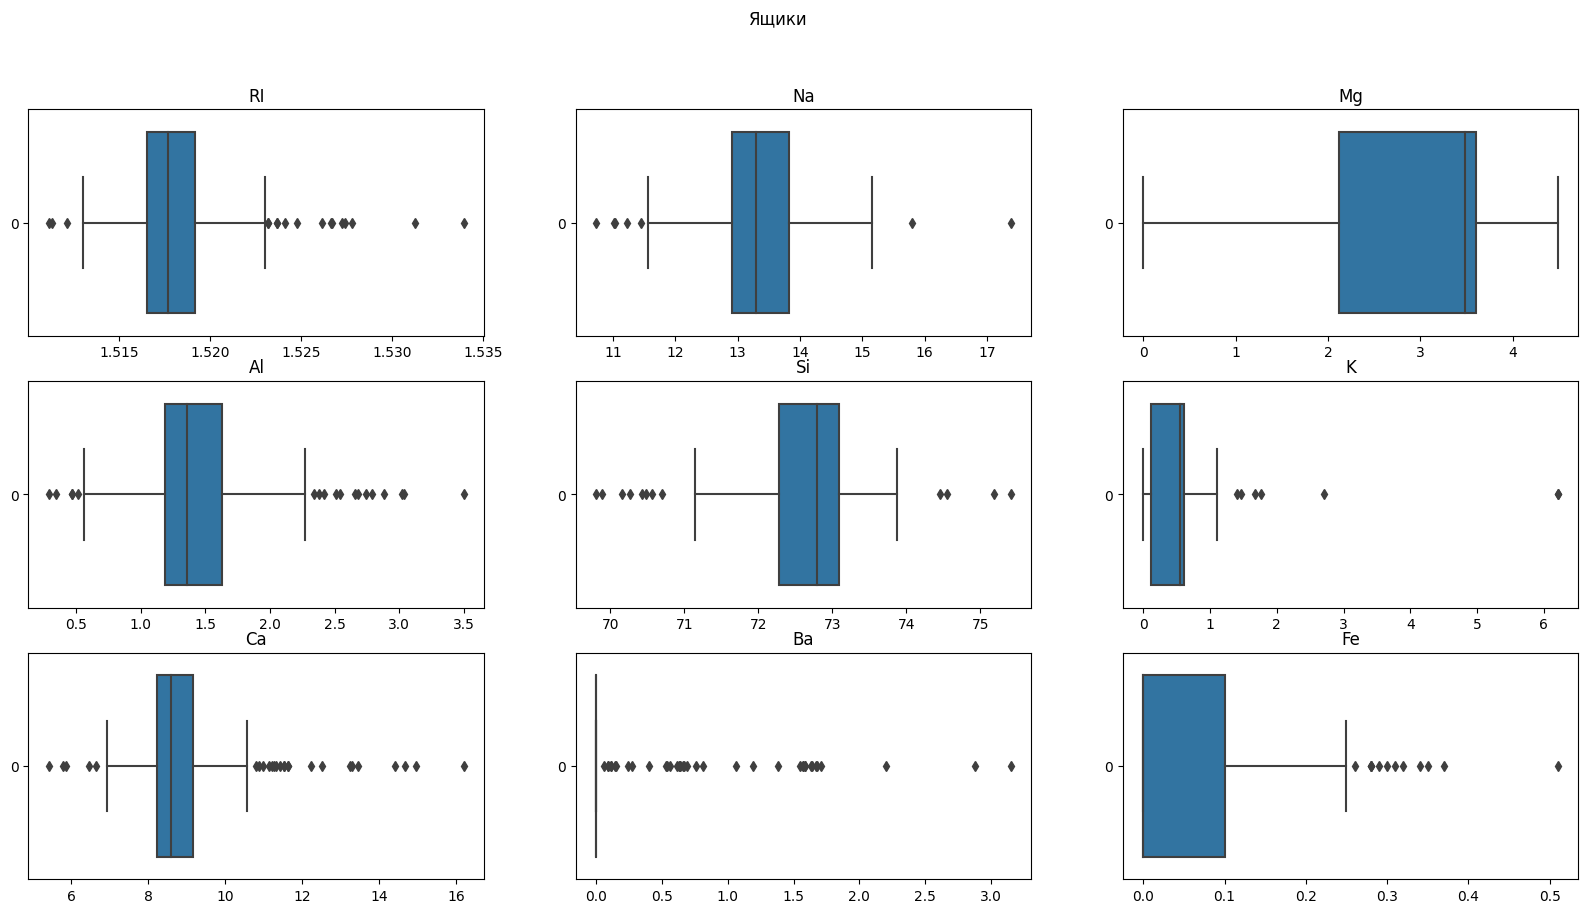

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10) )
fig.suptitle('Ящики')
sns.boxplot(df['RI'], ax=axs[0, 0], orient='h')
axs[0, 0].set_title('RI')
sns.boxplot(df['Na'], ax=axs[0, 1], orient='h')
axs[0, 1].set_title('Na')
sns.boxplot(df['Mg'], ax=axs[0, 2], orient='h')
axs[0, 2].set_title('Mg')

sns.boxplot(df['Al'], ax=axs[1, 0], orient='h')
axs[1, 0].set_title('Al')
sns.boxplot(df['Si'], ax=axs[1, 1], orient='h')
axs[1, 1].set_title('Si')
sns.boxplot(df['K'], ax=axs[1, 2], orient='h')
axs[1, 2].set_title('K')

sns.boxplot(df['Ca'], ax=axs[2, 0], orient='h')
axs[2, 0].set_title('Ca')
sns.boxplot(df['Ba'], ax=axs[2, 1], orient='h')
axs[2, 1].set_title('Ba')
sns.boxplot(df['Fe'], ax=axs[2, 2], orient='h')
axs[2, 2].set_title('Fe')

fig.show()

In [68]:
ocs = OneClassSVM(nu=0.1)
ocs.fit(df.drop(columns=['Type']).values)
out = ocs.predict(df.drop(columns=['Type']).values)

df_cln = df.copy()
df_cln['Out'] = out
#print(df_cln[['Type', 'Out']][df_cln['Out'] < 0])

type_cnt = df_cln[['Type', 'Out']].groupby('Type').count()
type_cnt_good = df_cln[['Type', 'Out']][df_cln['Out'] > 0].groupby('Type').count()

df_cnt = pd.DataFrame({'type_cnt': type_cnt['Out'].values, 'type_cnt_good': type_cnt_good['Out'].values})
print('Процент удаленных записей по классам')
(df_cnt['type_cnt'] - df_cnt['type_cnt_good'])/df_cnt['type_cnt']*100

Процент удаленных записей по классам


0     2.857143
1    13.157895
2     0.000000
3    30.769231
4    22.222222
5    17.241379
dtype: float64

In [83]:

ifo = IsolationForest(random_state=42, contamination=0.01)
ifo.fit(df.drop(columns=['Type']).values)
out = ifo.predict(df.drop(columns=['Type']).values)

df_cln = df.copy()
df_cln['Out'] = out
#print(df_cln[['Type', 'Out']][df_cln['Out'] < 0])

type_cnt = df_cln[['Type', 'Out']].groupby('Type').count()
type_cnt_good = df_cln[['Type', 'Out']][df_cln['Out'] > 0].groupby('Type').count()

df_cln = df_cln[df_cln['Out'] > 0].drop(columns=['Out'])

df_cnt = pd.DataFrame({'type_cnt': type_cnt['Out'].values, 'type_cnt_good': type_cnt_good['Out'].values})
print('Процент удаленных записей по классам')
(df_cnt['type_cnt'] - df_cnt['type_cnt_good'])/df_cnt['type_cnt']*100




Процент удаленных записей по классам


0    0.000000
1    2.631579
2    0.000000
3    7.692308
4    0.000000
5    0.000000
dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_cln.drop(columns=['Type']).values, df_cln['Type'].values, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
print(f"{model.score(X_train, y_train)} {model.score(X_test, y_test)}")
print("\n")
y_pred = model.predict(X_test)
print(f"accuracy= {accuracy_score(y_test, y_pred)}")

1.0 0.8604651162790697


accuracy= 0.8604651162790697


Выводы:
1. Данные были исследованы на наличие выбросов, удалены объекты с выбросами
2. Удаление выбросов не дало увеличения точности исходной модели. Скорее всего так получилось, потому что используемый алгоритм - случайный лес - изначально устойчив к данным с выбросами. Кроме того, ряд признаков имеют распределения, не имеющие одного явного кластера (и в целом не похожие на нормальное распределение), что затрудняет выделение выбросов.
3. Исследовать данные на выбросы нужно, в первую очередь, для моделей, чувствительных к выбросам, таким как линейная регрессия, логистическая регрессия, нейронные сети. Исследовать данные на выбросы для других моделей тоже полезно, но может не дать результата, как в текущем примере.
